In [1]:
import dask
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from matplotlib import cm
import copy
import astropy
import hdbscan
import pandas as pd

from astropy.io import fits

In [84]:
# hdul = fits.open('http://gal-03.sai.msu.ru/~vtoptun/photometry/rcsed_v2_clean.fits', memmap=astropy.io.fits.Conf.use_memmap.defaultvalue, lazy_load_hdus=True)
# hdul = fits.open('http://gal-03.sai.msu.ru/~vtoptun/redshift/rcsed_v2.fits')
hdul = fits.open('rcsed_v2_clean.fits', memmap=astropy.io.fits.Conf.use_memmap.defaultvalue, lazy_load_hdus=True)

In [85]:
cols = hdul[1].columns

In [86]:
data = hdul[1].data#[:500000]

In [87]:
hdul.close()
del hdul

In [88]:
DATA = pd.DataFrame(np.array(data).byteswap().newbyteorder()) #[:100]

In [89]:
del data

In [8]:
DATA.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105516 entries, 0 to 4105515
Data columns (total 559 columns):
ind                          4105516 non-null int32
ra                           4105516 non-null float64
dec                          4105516 non-null float64
z_sdss                       3169675 non-null float64
zerr_sdss                    3163704 non-null float64
specObjID_sdss               3171529 non-null float64
bestObjID_sdss               4105516 non-null int64
plate_sdss                   4105516 non-null int16
mjd_sdss                     4105516 non-null int32
fiberID_sdss                 4105516 non-null int16
z_2df                        220438 non-null float32
q_z_2df                      4105516 non-null int32
SeqNum_2df                   4105516 non-null object
z_6df                        116200 non-null float64
quality_6df                  4105516 non-null int16
targetname_6df               4105516 non-null object
specid_6df                   4105516 non

In [9]:
DATA = DATA.select_dtypes(exclude='object')

In [10]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105516 entries, 0 to 4105515
Columns: 553 entries, ind to modelMagErr_g
dtypes: float32(312), float64(217), int16(7), int32(10), int64(1), int8(4), uint8(2)
memory usage: 11.7 GB


In [11]:
data_float = DATA.select_dtypes(include=['float32', 'float64'])
data_int = DATA.select_dtypes(include=['int8','int16','int32','int64','uint8'])

converted_float = data_float.apply(pd.to_numeric,downcast='float')
converted_int = data_int.apply(pd.to_numeric,downcast='unsigned')

del data_float, data_int

In [12]:
DATA = pd.concat([converted_float, converted_int],axis=1)

del converted_float,converted_int

In [13]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105516 entries, 0 to 4105515
Columns: 553 entries, ra to wigglez_photo
dtypes: float32(529), int16(7), int32(9), int64(1), uint32(1), uint8(6)
memory usage: 8.4 GB


In [14]:
# df = pd.DataFrame(data = [[1,2,3],[1,3,3]])
# df.replace([3,2],np.nan)

In [15]:
null_list = [-2147483648, '', '', '', '', '', -9223372036854775808, -32768, -2147483648, -32768, '', -2147483648, '', '', -32768, '', -2147483648, -2147483648, '', '', '', '', '', '', '', -2147483648, -2147483648, -2147483648, '', 255, 255, '', -32768, -32768, '', '', -2147483648, '', -2147483648, '', -32768, '', '', -32768, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [16]:
pd.Series(null_list).unique()

array([-2147483648, '', -9223372036854775808, -32768, 255], dtype=object)

In [17]:
DATA.replace([
#     -2147483648, -9223372036854775808,-32768,255, -999999488.0,
#  99.0,
#  0.0,
#  -99.0,
#  9999.0,
#  -999.0,
#  0.05299999937415123,
 float('inf'),
#  3.5,
#  -9999.0,
#  4.619999885559082,
#  0.05000000074505806,
#  70.0,
#  4.0,
#  179.96949768066406,
#  0.06128999963402748,
#  24.6346492767334,
# #              8.400000e+01, 3.960000e+00
             ], np.nan, inplace=True)

In [18]:
DATA.dropna(axis=1,
    how='all',
    thresh=None,
    subset=None,
    inplace=True)

In [19]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105516 entries, 0 to 4105515
Columns: 553 entries, ra to wigglez_photo
dtypes: float32(529), int64(24)
memory usage: 8.8 GB


In [20]:
DATA.shape

(4105516, 553)

In [21]:
# (~DATA.z_sdss.isna()).sum()

In [22]:
DATA.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105516 entries, 0 to 4105515
Data columns (total 553 columns):
ra                           4105516 non-null float32
dec                          4105516 non-null float32
z_sdss                       3169675 non-null float32
zerr_sdss                    3163704 non-null float32
specObjID_sdss               3171529 non-null float32
z_2df                        220438 non-null float32
z_6df                        116200 non-null float32
z_uzc                        19365 non-null float32
z_err_uzc                    19373 non-null float32
z_cfa                        40716 non-null float32
z_err_cfa                    40727 non-null float32
z_hectospec                  159344 non-null float32
z_lamost                     181205 non-null float32
z_err_lamost                 225429 non-null float32
z_lega_c                     1806 non-null float32
Z_deep2                      34463 non-null float32
Z_deep3                      7170 non-nu

In [23]:
pd.set_option('max_columns', None)
DATA.head()

,ra,dec,z_sdss,zerr_sdss,specObjID_sdss,z_2df,z_6df,z_uzc,z_err_uzc,z_cfa,z_err_cfa,z_hectospec,z_lamost,z_err_lamost,z_lega_c,Z_deep2,Z_deep3,z_wigglez,Z_gama,E_bv,A_u_sdss,A_g_sdss,A_r_sdss,A_i_sdss,A_z_sdss,A_g_des,A_r_des,A_i_des,A_z_des,A_u_skymapper,A_v_skymapper,A_g_skymapper,A_r_skymapper,A_i_skymapper,A_z_skymapper,A_Y_ukidss,A_J_ukidss,A_H_ukidss,A_K_ukidss,A_Z_viking,A_Y_viking,A_J_viking,A_H_viking,A_ks_viking,A_g_panstarrs,A_r_panstarrs,A_i_pansatrrs,A_z_panstarrs,A_y_panstarrs,A_w1_wise,A_w2_wise,A_w3_wise,A_w4_wise,A_NUV_galex,A_FUV_galex,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,fibermag_u_sdss,fibermag_g_sdss,fibermag_r_sdss,fibermag_i_sdss,fibermag_z_sdss,fibermagerr_u_sdss,fibermagerr_g_sdss,fibermagerr_r_sdss,fibermagerr_i_sdss,fibermagerr_z_sdss,fiber2mag_u_sdss,fiber2mag_g_sdss,fiber2mag_r_sdss,fiber2mag_i_sdss,fiber2mag_z_sdss,fiber2magerr_u_sdss,fiber2magerr_g_sdss,fiber2magerr_r_sdss,fiber2magerr_i_sdss,fiber2magerr_z_sdss,petromag_u_sdss,petromag_g_sdss,petromag_r_sdss,petromag_i_sdss,petromag_z_sdss,petromagerr_u_sdss,petromagerr_g_sdss,petromagerr_r_sdss,petromagerr_i_sdss,petromagerr_z_sdss,petror50_u_sdss,petror50_g_sdss,petror50_r_sdss,petror50_i_sdss,petror50_z_sdss,magerr_petro_g_des,magerr_petro_r_des,magerr_petro_i_des,magerr_petro_z_des,magerr_petro_y_des,mag_petro_g_des,mag_petro_r_des,mag_petro_i_des,mag_petro_z_des,mag_petro_y_des,petro_radius_g_des,petro_radius_r_des,petro_radius_i_des,petro_radius_z_des,petro_radius_y_des,mag_aper_8_g_des,magerr_aper_8_g_des,mag_aper_8_r_des,magerr_aper_8_r_des,mag_aper_8_i_des,magerr_aper_8_i_des,mag_aper_8_z_des,magerr_aper_8_z_des,mag_aper_8_y_des,magerr_aper_8_y_des,mag_auto_g_des,magerr_auto_g_des,mag_auto_r_des,magerr_auto_r_des,mag_auto_i_des,magerr_auto_i_des,mag_auto_z_des,magerr_auto_z_des,mag_auto_y_des,magerr_auto_y_des,mag_aper_8_g_dered,mag_aper_8_r_dered,mag_aper_8_i_dered,mag_aper_8_z_dered,mag_aper_8_y_dered,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,mag_auto_z_dered,mag_auto_y_dered,kron_radius_g_des,kron_radius_r_des,kron_radius_i_des,kron_radius_z_des,kron_radius_y_des,umag_kids,e_umag_kids,gmag_kids,e_gmag_kids,rmag_kids,e_rmag_kids,imag_kids,e_imag_kids,u_petro_skymapper,e_u_petro_skymapper,v_petro_skymapper,e_v_petro_skymapper,g_petro_skymapper,e_g_petro_skymapper,r_petro_skymapper,e_r_petro_skymapper,i_petro_skymapper,e_i_petro_skymapper,z_petro_skymapper,e_z_petro_skymapper,JPETROMAG_uhs,JPETROMAGERR_uhs,JAPERMAG3_uhs,JAPERMAG3ERR_uhs,JAPERMAG4_uhs,JAPERMAG4ERR_uhs,JAPERMAG6_uhs,JAPERMAG6ERR_uhs,YPETROMAG_ukidss,YPETROMAGERR_ukidss,YAPERMAG3_ukidss,YAPERMAG3ERR_ukidss,YAPERMAG4_ukidss,YAPERMAG4ERR_ukidss,YAPERMAG6_ukidss,YAPERMAG6ERR_ukidss,JPETROMAG_ukidss,JPETROMAGERR_ukidss,JAPERMAG3_ukidss,JAPERMAG3ERR_ukidss,JAPERMAG4_ukidss,JAPERMAG4ERR_ukidss,JAPERMAG6_ukidss,JAPERMAG6ERR_ukidss,J_1PETROMAG_ukidss,J_1PETROMAGERR_ukidss,J_1APERMAG3_ukidss,J_1APERMAG3ERR_ukidss,J_1APERMAG4_ukidss,J_1APERMAG4ERR_ukidss,J_1APERMAG6_ukidss,J_1APERMAG6ERR_ukidss,J_2PETROMAG_ukidss,J_2PETROMAGERR_ukidss,J_2APERMAG3_ukidss,J_2APERMAG3ERR_ukidss,J_2APERMAG4_ukidss,J_2APERMAG4ERR_ukidss,J_2APERMAG6_ukidss,J_2APERMAG6ERR_ukidss,HPETROMAG_ukidss,HPETROMAGERR_ukidss,HAPERMAG3_ukidss,HAPERMAG3ERR_ukidss,HAPERMAG4_ukidss,HAPERMAG4ERR_ukidss,HAPERMAG6_ukidss,HAPERMAG6ERR_ukidss,KPETROMAG_ukidss,KPETROMAGERR_ukidss,KPSFMAG_ukidss,KPSFMAGERR_ukidss,KSERMAG2D_ukidss,KSERMAG2DERR_ukidss,KAPERMAG3_ukidss,KAPERMAG3ERR_ukidss,KAPERMAG4_ukidss,KAPERMAG4ERR_ukidss,KAPERMAG6_ukidss,KAPERMAG6ERR_ukidss,EBV_ukidss,AY_ukidss,AH_ukidss,AK_ukidss,yPetroMag_vhs,yPetroMagErr_vhs,yAperMag3_vhs,yAperMag3Err_vhs,yAperMag4_vhs,yAperMag4Err_vhs,yAperMag6_vhs,yAperMag6Err_vhs,jPetroMag_vhs,jPetroMagErr_vhs,jAperMag3_vhs,jAperMag3Err_vhs,jAperMag4_vhs,jAperMag4Err_vhs,jAperMag6_vhs,jAperMag6Err_vhs,hPetroMag_vhs,hPetroMagErr_vhs,hAperMag3_vhs,hAperMag3Err_vhs,hAperMag4_vhs,hAperMag4Err_vhs,hAperMag6_vhs,hAperMag6Err_vhs,ksPetroMag_vhs,ksPetroMagEr

**Наблюдения:**
- в некоторых колонках,  в которых присутствуют все значния есть очень странные значения вроде "-2147483648" или "-32768" и другие

In [24]:
#    Здесь мы создадим датафрейм с наиболее 
#       частотными значениями по каждому из столбцов

top_values = []

for col in DATA.columns[1:]:
    vc = DATA[col].value_counts(ascending=False).head(1)
    top_values.append([vc.name, vc.index[0], vc[vc.index[0]]])
    
anomaly = pd.DataFrame(data=top_values, columns = ['column_name', 'anomaly_value', 'value_counts'])

In [25]:
# Здесь мы создаем колонку с количеством
#  ненулевых значений в каждом из столбцов таблицы
#     DATA, начиная с ra

not_nan = []

for col in DATA.columns[1:]:
    not_nan.append((~DATA[col].isna()).sum())
    
not_nan = pd.Series(not_nan)

In [26]:
# Дополним получившийся датафрейм столбцом, показывающим,
# какую долю от длины всего столбца занимает каждое аномальное значение

import copy

top_values_data = copy.copy(anomaly)

top_values_data['percent_total'] = (top_values_data.value_counts / len(DATA)).round(3)
top_values_data['percent_not_nan'] = (top_values_data.value_counts / not_nan).round(3)

In [27]:
# Выведем на экран получившйся датафрейм

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(top_values_data.sort_values(by='percent_not_nan', ascending=False))

,column_name,anomaly_value,value_counts,percent_total,percent_not_nan
9,z_err_cfa,0.000000e+00,40726,0.010,1.000
215,KPSFMAGERR_ukidss,-9.999995e+08,1070222,0.261,1.000
216,KSERMAG2D_ukidss,-9.999995e+08,1070222,0.261,1.000
214,KPSFMAG_ukidss,-9.999995e+08,1070222,0.261,1.000
7,z_err_uzc,0.000000e+00,19372,0.005,1.000
543,f_spec_lega_c,-3.276800e+04,4103699,1.000,1.000
217,KSERMAG2DERR_ukidss,-9.999995e+08,1070222,0.261,1.000
542,f_z_lega_c,-3.276800e+04,4103699,1.000,1.000
545,OBJNO_deep3,-2.147484e+09,4098306,0.998,0.998
536,recno_uzc,-2.147484e+09,4086037,0.995,0.995


### Анализ данных на основе таблицы top_values_data

Таблица **top_values_data** содержит в себе следующие столбцы:
- **column_name**   -   названия столбцов таблицы **DATA**

- **anomaly_value**   -   наиболее частотные значения столбцов таблицы **DATA**

- **value_counts**   -   количество раз, которое *anomaly_value* встречается в столбце таблицы **DATA**

- **percent_total**   -   доля *anomaly_value* от всего объема столбца таблицы **DATA**

- **percent_not_nan**   -   доля *anomaly_value* от non-null объема столбца таблицы **DATA**

В ячейке ниже показано, сколько столбцов таблицы **DATA** содержат более **90% и т.д.** аномальных значений от общего количества non-null значений столбца. Оказывается, что около трети столбцов (162) содержат таки аномалий больше, чем **10%**.

**! Нужно понять, какой порог считать допустимым.**

**! Остальные можно отбросить.**


In [28]:
for num in np.arange(0.9,0.0,-0.05).round(2):
    print(num, '   ', len(top_values_data.query('percent_not_nan > @num')))

0.9     26
0.85     34
0.8     34
0.75     34
0.7     36
0.65     65
0.6     65
0.55     82
0.5     82
0.45     87
0.4     95
0.35     95
0.3     97
0.25     102
0.2     108
0.15     111
0.1     156
0.05     213


In [29]:
#     Добавим столбец non_null_part, показываающий 
#     какую часть от величины столбца составляют ненулевые значения

top_values_data['non_null_part'] = (not_nan / len(DATA)).round(3)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(top_values_data.sort_values(by='non_null_part', ascending=True))

,column_name,anomaly_value,value_counts,percent_total,percent_not_nan,non_null_part
13,z_lega_c,7.282000e-01,5,0.000,0.003,0.000
152,u_petro_skymapper,1.828700e+01,17,0.000,0.002,0.002
154,v_petro_skymapper,1.763700e+01,11,0.000,0.002,0.002
155,e_v_petro_skymapper,1.340000e-01,48,0.000,0.007,0.002
153,e_u_petro_skymapper,1.470000e-01,90,0.000,0.009,0.002
15,Z_deep3,5.334126e-01,4,0.000,0.001,0.002
6,z_uzc,1.719523e-02,9,0.000,0.000,0.005
7,z_err_uzc,0.000000e+00,19372,0.005,1.000,0.005
156,g_petro_skymapper,1.813900e+01,31,0.000,0.001,0.008
157,e_g_petro_skymapper,1.470000e-01,230,0.000,0.007,0.008


In [30]:
# Выясним сколько столбцов таблицы DATA  заполнены меньше чем на num*100 %

for num in np.arange(0.9,0.0,-0.1).round(2):
    print(num, '   ', len(top_values_data.query('non_null_part < @num')))

0.9     479
0.8     419
0.7     414
0.6     414
0.5     373
0.4     301
0.3     258
0.2     202
0.1     120


In [31]:
len(top_values_data.query('(non_null_part<0.01)&(percent_not_nan<0.5)'))

10

In [32]:
# [8.400000e+01, 3.960000e+00]

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(top_values_data.sort_values(by='anomaly_value', ascending=False))

,column_name,anomaly_value,value_counts,percent_total,percent_not_nan,non_null_part
3,specObjID_sdss,7.635951e+18,5,0.000,0.000,0.773
528,ind,4.196351e+06,1,0.000,0.000,1.000
408,w2sigmag_5_wise,9.999000e+03,96820,0.024,0.051,0.463
416,w3sigmag_wise,9.999000e+03,1262262,0.307,0.663,0.463
432,w3sigmag_8_wise,9.999000e+03,1262262,0.307,0.663,0.463
430,w3sigmag_7_wise,9.999000e+03,1262262,0.307,0.663,0.463
426,w3sigmag_5_wise,9.999000e+03,1262262,0.307,0.663,0.463
424,w3sigmag_4_wise,9.999000e+03,1262262,0.307,0.663,0.463
422,w3sigmag_3_wise,9.999000e+03,1262262,0.307,0.663,0.463
420,w3sigmag_2_wise,9.999000e+03,1262262,0.307,0.663,0.463


In [34]:
# Выведем на экран получившйся датафрейм

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(top_values_data.sort_values(by='value_counts', ascending=False))

,column_name,anomaly_value,value_counts,percent_total,percent_not_nan,non_null_part
543,f_spec_lega_c,-3.276800e+04,4103699,1.000,1.000,1.000
542,f_z_lega_c,-3.276800e+04,4103699,1.000,1.000,1.000
545,OBJNO_deep3,-2.147484e+09,4098306,0.998,0.998,1.000
536,recno_uzc,-2.147484e+09,4086037,0.995,0.995,1.000
549,dz,7.000000e+01,4080327,0.994,0.994,1.000
550,phot_data_new_galex,8.400000e+01,4076694,0.993,0.993,1.000
544,OBJNO_deep2,-2.147484e+09,4071053,0.992,0.992,1.000
534,quality_6df,-3.276800e+04,3989227,0.972,0.972,1.000
535,specid_6df,-2.147484e+09,3989227,0.972,0.972,1.000
547,NQ_gama,-3.276800e+04,3946981,0.961,0.961,1.000


In [35]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(DATA.describe(include='object'))

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(DATA.describe())

,ra,dec,z_sdss,zerr_sdss,specObjID_sdss,z_2df,z_6df,z_uzc,z_err_uzc,z_cfa,z_err_cfa,z_hectospec,z_lamost,z_err_lamost,z_lega_c,Z_deep2,Z_deep3,z_wigglez,Z_gama,E_bv,A_u_sdss,A_g_sdss,A_r_sdss,A_i_sdss,A_z_sdss,A_g_des,A_r_des,A_i_des,A_z_des,A_u_skymapper,A_v_skymapper,A_g_skymapper,A_r_skymapper,A_i_skymapper,A_z_skymapper,A_Y_ukidss,A_J_ukidss,A_H_ukidss,A_K_ukidss,A_Z_viking,A_Y_viking,A_J_viking,A_H_viking,A_ks_viking,A_g_panstarrs,A_r_panstarrs,A_i_pansatrrs,A_z_panstarrs,A_y_panstarrs,A_w1_wise,A_w2_wise,A_w3_wise,A_w4_wise,A_NUV_galex,A_FUV_galex,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,fibermag_u_sdss,fibermag_g_sdss,fibermag_r_sdss,fibermag_i_sdss,fibermag_z_sdss,fibermagerr_u_sdss,fibermagerr_g_sdss,fibermagerr_r_sdss,fibermagerr_i_sdss,fibermagerr_z_sdss,fiber2mag_u_sdss,fiber2mag_g_sdss,fiber2mag_r_sdss,fiber2mag_i_sdss,fiber2mag_z_sdss,fiber2magerr_u_sdss,fiber2magerr_g_sdss,fiber2magerr_r_sdss,fiber2magerr_i_sdss,fiber2magerr_z_sdss,petromag_u_sdss,petromag_g_sdss,petromag_r_sdss,petromag_i_sdss,petromag_z_sdss,petromagerr_u_sdss,petromagerr_g_sdss,petromagerr_r_sdss,petromagerr_i_sdss,petromagerr_z_sdss,petror50_u_sdss,petror50_g_sdss,petror50_r_sdss,petror50_i_sdss,petror50_z_sdss,magerr_petro_g_des,magerr_petro_r_des,magerr_petro_i_des,magerr_petro_z_des,magerr_petro_y_des,mag_petro_g_des,mag_petro_r_des,mag_petro_i_des,mag_petro_z_des,mag_petro_y_des,petro_radius_g_des,petro_radius_r_des,petro_radius_i_des,petro_radius_z_des,petro_radius_y_des,mag_aper_8_g_des,magerr_aper_8_g_des,mag_aper_8_r_des,magerr_aper_8_r_des,mag_aper_8_i_des,magerr_aper_8_i_des,mag_aper_8_z_des,magerr_aper_8_z_des,mag_aper_8_y_des,magerr_aper_8_y_des,mag_auto_g_des,magerr_auto_g_des,mag_auto_r_des,magerr_auto_r_des,mag_auto_i_des,magerr_auto_i_des,mag_auto_z_des,magerr_auto_z_des,mag_auto_y_des,magerr_auto_y_des,mag_aper_8_g_dered,mag_aper_8_r_dered,mag_aper_8_i_dered,mag_aper_8_z_dered,mag_aper_8_y_dered,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,mag_auto_z_dered,mag_auto_y_dered,kron_radius_g_des,kron_radius_r_des,kron_radius_i_des,kron_radius_z_des,kron_radius_y_des,umag_kids,e_umag_kids,gmag_kids,e_gmag_kids,rmag_kids,e_rmag_kids,imag_kids,e_imag_kids,u_petro_skymapper,e_u_petro_skymapper,v_petro_skymapper,e_v_petro_skymapper,g_petro_skymapper,e_g_petro_skymapper,r_petro_skymapper,e_r_petro_skymapper,i_petro_skymapper,e_i_petro_skymapper,z_petro_skymapper,e_z_petro_skymapper,JPETROMAG_uhs,JPETROMAGERR_uhs,JAPERMAG3_uhs,JAPERMAG3ERR_uhs,JAPERMAG4_uhs,JAPERMAG4ERR_uhs,JAPERMAG6_uhs,JAPERMAG6ERR_uhs,YPETROMAG_ukidss,YPETROMAGERR_ukidss,YAPERMAG3_ukidss,YAPERMAG3ERR_ukidss,YAPERMAG4_ukidss,YAPERMAG4ERR_ukidss,YAPERMAG6_ukidss,YAPERMAG6ERR_ukidss,JPETROMAG_ukidss,JPETROMAGERR_ukidss,JAPERMAG3_ukidss,JAPERMAG3ERR_ukidss,JAPERMAG4_ukidss,JAPERMAG4ERR_ukidss,JAPERMAG6_ukidss,JAPERMAG6ERR_ukidss,J_1PETROMAG_ukidss,J_1PETROMAGERR_ukidss,J_1APERMAG3_ukidss,J_1APERMAG3ERR_ukidss,J_1APERMAG4_ukidss,J_1APERMAG4ERR_ukidss,J_1APERMAG6_ukidss,J_1APERMAG6ERR_ukidss,J_2PETROMAG_ukidss,J_2PETROMAGERR_ukidss,J_2APERMAG3_ukidss,J_2APERMAG3ERR_ukidss,J_2APERMAG4_ukidss,J_2APERMAG4ERR_ukidss,J_2APERMAG6_ukidss,J_2APERMAG6ERR_ukidss,HPETROMAG_ukidss,HPETROMAGERR_ukidss,HAPERMAG3_ukidss,HAPERMAG3ERR_ukidss,HAPERMAG4_ukidss,HAPERMAG4ERR_ukidss,HAPERMAG6_ukidss,HAPERMAG6ERR_ukidss,KPETROMAG_ukidss,KPETROMAGERR_ukidss,KPSFMAG_ukidss,KPSFMAGERR_ukidss,KSERMAG2D_ukidss,KSERMAG2DERR_ukidss,KAPERMAG3_ukidss,KAPERMAG3ERR_ukidss,KAPERMAG4_ukidss,KAPERMAG4ERR_ukidss,KAPERMAG6_ukidss,KAPERMAG6ERR_ukidss,EBV_ukidss,AY_ukidss,AH_ukidss,AK_ukidss,yPetroMag_vhs,yPetroMagErr_vhs,yAperMag3_vhs,yAperMag3Err_vhs,yAperMag4_vhs,yAperMag4Err_vhs,yAperMag6_vhs,yAperMag6Err_vhs,jPetroMag_vhs,jPetroMagErr_vhs,jAperMag3_vhs,jAperMag3Err_vhs,jAperMag4_vhs,jAperMag4Err_vhs,jAperMag6_vhs,jAperMag6Err_vhs,hPetroMag_vhs,hPetroMagErr_vhs,hAperMag3_vhs,hAperMag3Err_vhs,hAperMag4_vhs,hAperMag4Err_vhs,hAperMag6_vhs,hAperMag6Err_vhs,ksPetroMag_vhs,ksPetroMagEr

In [37]:
top_values_data[top_values_data['anomaly_value']==float('inf')]

,column_name,anomaly_value,value_counts,percent_total,percent_not_nan,non_null_part


In [38]:
# anomaly_to_drop = list(top_values_data.anomaly_value.value_counts()
#                        [top_values_data.anomaly_value.value_counts(ascending=False)>1].index)

In [39]:
# DATA.replace(anomaly_to_drop, np.nan, inplace=True)

In [40]:
# list(top_values_data.anomaly_value.value_counts()
#                        [top_values_data.anomaly_value.value_counts(ascending=False)>1].index)

In [41]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105516 entries, 0 to 4105515
Columns: 553 entries, ra to wigglez_photo
dtypes: float32(529), int64(24)
memory usage: 8.8 GB


In [42]:
# Найдем колонки, в которых аномальные значения
#     составляют не менее 90% от всех ненулевых значений столбца 

# percent_not_nan - доля anomaly_value от non-null объема столбца таблицы DATA
# non_null_part - доля ненулевых значений  от величины столбца 

# columns_drop = top_values_data[(top_values_data['percent_not_nan']*top_values_data['non_null_part'] > 0.8)
#                                |(top_values_data['non_null_part'] > 0.9)
#                                |(top_values_data['anomaly_value']==float('inf'))].column_name 

In [43]:
# Удалим колонки из DATA, в которых анамальные значения
#     составляют о не менее 90% от всех ненулевых значений столбца 

# DATA.drop(labels=columns_drop, axis = 1, inplace=True)

Кажется, что мы очистили таблицу от всех столбцов, несущих мало информации, так как они содержали большое количество NaN или аномальных значений.

**Следующим нашим шагом** будет использование **IterativeImputer** чтобы заполнить оставшиеся пустые значения таблицы.

К новой заполненной таблице можно будет применить методы понижения разверности: VAE, t-SNE, PCA и др.

А далее уже кластеризировать.

In [44]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105516 entries, 0 to 4105515
Columns: 553 entries, ra to wigglez_photo
dtypes: float32(529), int64(24)
memory usage: 8.8 GB


In [45]:
DATA = DATA.select_dtypes(include=['float32', 'float64']).apply(pd.to_numeric,downcast='float')

In [46]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105516 entries, 0 to 4105515
Columns: 529 entries, ra to modelMagErr_g
dtypes: float32(529)
memory usage: 8.1 GB


In [47]:
DATA_columns = DATA.columns

In [48]:
from sklearn.preprocessing import MinMaxScaler #StandardScaler
nrmlzr = MinMaxScaler()
x = nrmlzr.fit_transform(DATA)
del DATA

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [50]:
# # imputer = IterativeImputer(max_iter=10, tol=3*x.std().max(),random_state=42, 
# #                            estimator=ExtraTreesRegressor(n_estimators=10, random_state=0))

# imputer = IterativeImputer(max_iter=10, tol=3*x.std().max(),random_state=42, 
#                            estimator= DecisionTreeRegressor(max_features='sqrt', random_state=0))

# # imputer = IterativeImputer(max_iter=10, tol=3*x.std().max(),random_state=42, 
# #                            estimator=KNeighborsRegressor(n_neighbors=5, n_jobs=20))

# x = imputer.fit_transform(x)
x = np.nan_to_num(x)

In [51]:
import pandas as pd
y = pd.read_csv('rcsed_iGrID.csv')#[:500000]

In [52]:
sdss_indx = list(y[~y.iGrID.isna()].index)

In [53]:
x.shape

(4105516, 529)

In [54]:
# from sklearn.decomposition import TruncatedSVD

# tsvd = TruncatedSVD(n_components=1, algorithm='randomized', n_iter=5, random_state=42)
# x_new = tsvd.fit_transform(x)

In [55]:
x.shape

(4105516, 529)

In [56]:
# x_new.shape

In [57]:
# %%time
# clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, allow_single_cluster=True).fit(x_new)

In [58]:
y = y.loc[sdss_indx,:].to_numpy().flatten()
# clusterer.labels_[sdss_indx]

In [59]:
# m1 = sklearn.metrics.homogeneity_completeness_v_measure(y,clusterer.labels_[sdss_indx])
# m1

In [60]:
# text_file = open("m1.txt", "w")
# n = text_file.write(str(m1))
# text_file.close()

In [61]:
# y

In [62]:
# pip install torch torchvision

In [63]:
# DATA = pd.DataFrame(data=DATA_data, columns=DATA_columns)

In [64]:
# DATA.info(verbose=True,null_counts=True)

Далее применим VAE  (https://github.com/dgradoboev/project_galaxies/blob/master/VAE.ipynb)

In [65]:
# import pandas as pd
# import matplotlib.pyplot as plt

# import sys
# sys.path

from sklearn.cluster import *
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import astropy
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import constants as const
import hdbscan
from astropy.io import fits

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torchvision import datasets, transforms
from torch.autograd import Variable
# from torchvision.utils import save_image

In [66]:
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE, self).__init__()
        
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc31 = nn.Linear(h_dim2, z_dim)
        self.fc32 = nn.Linear(h_dim2, z_dim)

        self.fc4 = nn.Linear(z_dim, h_dim2)
        self.fc5 = nn.Linear(h_dim2, h_dim1)
        self.fc6 = nn.Linear(h_dim1, x_dim)
        
    def encoder(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc31(h), self.fc32(h)
    
    def sampling(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu)
        
    def decoder(self, z):
        h = F.relu(self.fc4(z))
        h = F.relu(self.fc5(h))
        return torch.sigmoid(self.fc6(h)) 
    
    def forward(self, x):
        mu, log_var = self.encoder(x.view(-1, x.shape[1]))
        z = self.sampling(mu, log_var)
        return self.decoder(z), mu, log_var

In [67]:
vae = VAE(x_dim=x.shape[1], h_dim1= int(x.shape[1]/2), h_dim2=int(x.shape[1]/4), z_dim=1)
if torch.cuda.is_available():
    vae.cuda()

optimizer = optim.Adam(vae.parameters())
train_loader = torch.utils.data.DataLoader(dataset=x, batch_size=int(len(x)/1000), shuffle=True)#, num_workers=20)

def loss_function(recon_x, x, mu, log_var):
    criterion = nn.MSELoss().cuda()
    BCE = criterion(recon_x, x.view(-1, x.shape[1]))
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

def train(epoch):
    vae.train()
    train_loss = 0
    for batch_idx in range(400):
        #data = torch.tensor(x.sample(n=1000).astype(np.float32).values)
        data = torch.tensor(x[np.random.choice(range(x.shape[0]), 1000)].astype(np.float32))
        optimizer.zero_grad()
        
        recon_batch, mu, log_var = vae(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

In [68]:
from joblib import Parallel, delayed

Parallel(n_jobs=20)(delayed(train)(epoch) for epoch in range(1,70));

/home/azarodnyuk/.local/lib/python3.5/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [69]:
# for epoch in range(1, 70):
#     train(epoch)# 

In [70]:
mu, log_var = vae.encoder(torch.tensor(x.astype(np.float32)))
embed = vae.sampling(mu, log_var).detach().numpy()

In [71]:
hdbScan = hdbscan.hdbscan_.HDBSCAN(min_cluster_size=2, min_samples=1, allow_single_cluster=True, core_dist_n_jobs=20).fit(embed)

In [72]:
m2 = homogeneity_completeness_v_measure(y,hdbScan.labels_[sdss_indx])
m2

(0.9341504254969535, 0.9129188354541362, 0.9234126046194289)

In [81]:
text_file = open("m2.txt", "w")
m = text_file.write(str(m2))
text_file.close()


In [82]:
text_file = open("m2.txt", "w")
m = text_file.write(str(m2))
text_file.close()

#### На полном датасете получили следующее качество для кластеризации:

In [80]:
# Лэйблы сохранили в файл 'hdbscan_labels_0.934_0.912_0.923.npy'

# np.save('hdbscan_labels_0.934_0.912_0.923',hdbScan.labels_) 

In [83]:
#np.load('hdbscan_labels_0.934_0.912_0.923.npy').shape

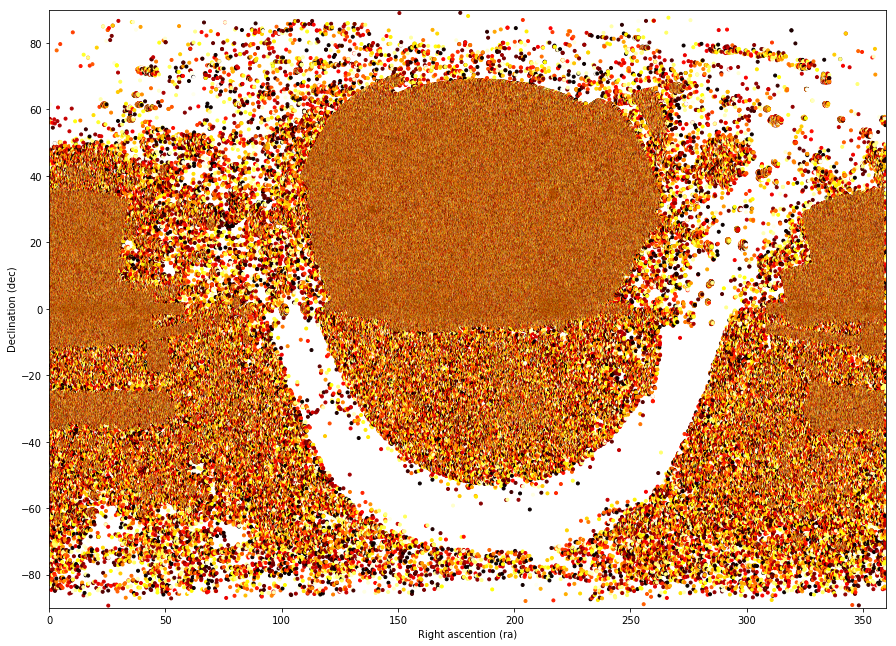

<Figure size 432x288 with 0 Axes>

In [90]:
from matplotlib import cm 

plt.figure(figsize=(15,11))
plt.scatter(DATA.ra, DATA.dec, cmap=cm.hot, marker='.', c=hdbScan.labels_)

plt.xlim(0,360)
plt.ylim(-90,90)

plt.xlabel('Right ascention (ra)')
plt.ylabel('Declination (dec)')
plt.show()
plt.savefig('rcsed_VAE_hdbscan.png')

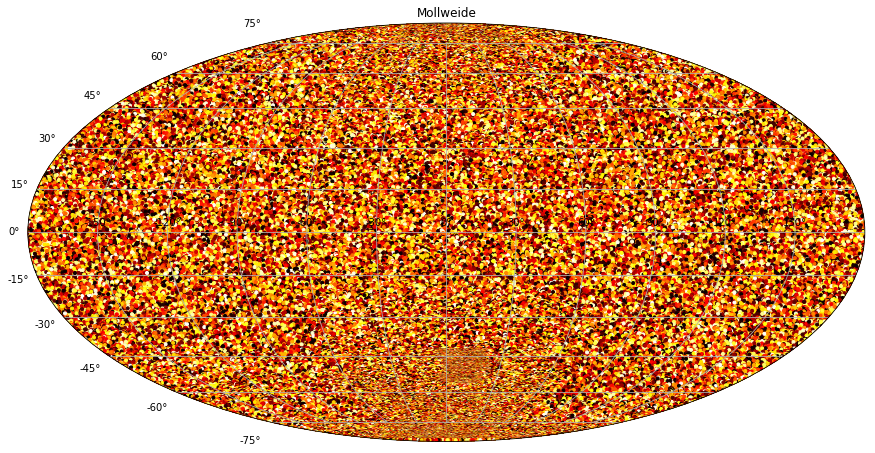

<Figure size 432x288 with 0 Axes>

In [104]:
plt.figure(figsize=(15,11))
plt.subplot(111, projection="mollweide")
plt.scatter(DATA.dec, DATA.ra, cmap=cm.hot, marker='.', c=hdbScan.labels_)
plt.title("Mollweide")
plt.grid(True)

plt.show()
plt.savefig('rcsed_VAE_hdbscan.png')

In [105]:
torch.save(vae.state_dict(),'checkpoint.pth')

In [106]:
torch.load('checkpoint.pth')
# vae.load_state_dict(state_dict)

OrderedDict([('fc1.weight',
              tensor([[ 0.0270, -0.0430, -0.0236,  ...,  0.0151, -0.0308,  0.0180],
                      [-0.0005,  0.0187, -0.0347,  ...,  0.0350,  0.0139,  0.0180],
                      [-0.0087, -0.0055, -0.0068,  ..., -0.0389,  0.0051,  0.0191],
                      ...,
                      [ 0.0176,  0.0405, -0.0014,  ...,  0.0200, -0.0199,  0.0303],
                      [ 0.0195,  0.0350, -0.0067,  ..., -0.0222, -0.0352,  0.0073],
                      [ 0.0132,  0.0013, -0.0393,  ...,  0.0428, -0.0374,  0.0309]])),
             ('fc1.bias',
              tensor([-0.0155,  0.0194, -0.0393,  0.0241,  0.0173, -0.0287, -0.0286,  0.0027,
                      -0.0074, -0.0029,  0.0172,  0.0182,  0.0429, -0.0295,  0.0234,  0.0132,
                       0.0308, -0.0067,  0.0306, -0.0036,  0.0087, -0.0188, -0.0292,  0.0234,
                       0.0057,  0.0138, -0.0339,  0.0145,  0.0291,  0.0316, -0.0025,  0.0072,
                       0.0264,  0.00